In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the cleaned dataset
data = pd.read_csv("FYP_cleaned.csv")

# Display the first few rows
print("First 5 rows of the dataset:")
print(data.head())

# Correct target column name
target = 'Hardness_H,_GPa'

# Separate features and target
X = data.drop(columns=[target])
y = data[target]

# Split into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n✅ Data prepared successfully!")
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")


First 5 rows of the dataset:
   x_Molar_Fraction  Density_g/cm³  Molar_Volume_cm³/mol  \
0          0.024982       3.189904             45.310382   
1          0.048029       3.149583             45.471668   
2          0.039280       2.994392             46.092431   
3          0.033946       3.421194             44.385224   
4          0.016241       3.291858             44.902568   

   Longitudinal_Velocity_vL,_m/s  Shear_Velocity_vS,_m/s  \
0                    8034.689131             4733.591601   
1                    7430.999426             4338.059731   
2                    7610.426150             4558.150249   
3                    7960.852681             4589.983684   
4                    7760.328278             4560.245881   

   Longitudinal_Modulus_L,_GPa  Shear_Modulus_G,_GPa  Young's_Modulus_E,_GPa  \
0                   206.611891             58.446439              140.759010   
1                   200.574994             52.235737              114.746777   
2        

In [3]:
# Step 2: Train and Evaluate ML Models

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
    "Linear Regression": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "SVR": SVR(),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0)
}

# Store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results[name] = {
        "R2 Score": r2,
        "MAE": mae,
        "RMSE": rmse
    }

    print(f"\n🔹 {name}")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")



🔹 Random Forest
R² Score: 0.9857
MAE: 0.1038
RMSE: 0.1217

🔹 Neural Network
R² Score: 0.9011
MAE: 0.2593
RMSE: 0.3206

🔹 Linear Regression
R² Score: 0.9870
MAE: 0.1012
RMSE: 0.1161

🔹 KNN
R² Score: 0.8483
MAE: 0.3212
RMSE: 0.3970

🔹 SVR
R² Score: 0.7733
MAE: 0.3982
RMSE: 0.4853

🔹 XGBoost
R² Score: 0.9848
MAE: 0.1069
RMSE: 0.1257


In [4]:
import pandas as pd

# Convert results dictionary to DataFrame for readability
results_df = pd.DataFrame(results).T
print(results_df)


                   R2 Score       MAE      RMSE
Random Forest      0.985741  0.103772  0.121720
Neural Network     0.901095  0.259318  0.320569
Linear Regression  0.987022  0.101180  0.116121
KNN                0.848294  0.321179  0.397021
SVR                0.773309  0.398227  0.485322
XGBoost            0.984783  0.106881  0.125740


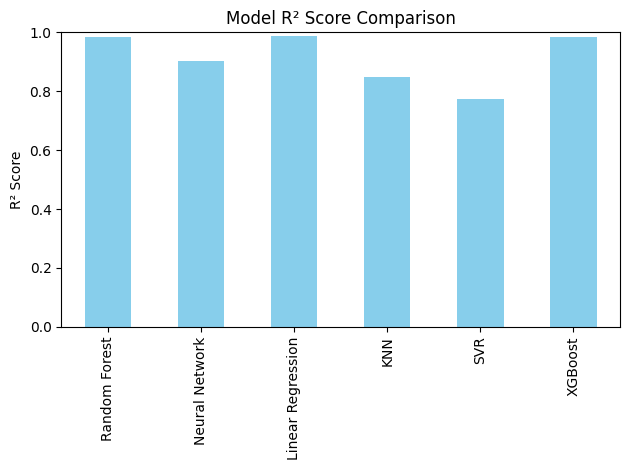

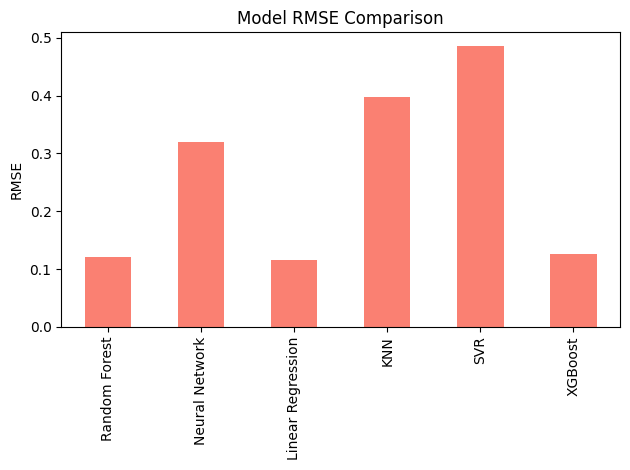

In [5]:
import matplotlib.pyplot as plt

# Bar plot for R2 Score
results_df["R2 Score"].plot(kind='bar', title='Model R² Score Comparison', ylabel='R² Score', ylim=(0, 1), color='skyblue')
plt.tight_layout()
plt.show()

# Bar plot for RMSE
results_df["RMSE"].plot(kind='bar', title='Model RMSE Comparison', ylabel='RMSE', color='salmon')
plt.tight_layout()
plt.show()


In [6]:
from sklearn.model_selection import train_test_split

# Assuming you already loaded `data` and defined `target`
X = data.drop(columns=[target])
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from xgboost import XGBRegressor

# Create and train XGBoost model
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [8]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [9]:
from xgboost import XGBRegressor

# Create and train the model
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [10]:
print(data.columns.tolist())


['x_Molar_Fraction', 'Density_g/cm³', 'Molar_Volume_cm³/mol', 'Longitudinal_Velocity_vL,_m/s', 'Shear_Velocity_vS,_m/s', 'Longitudinal_Modulus_L,_GPa', 'Shear_Modulus_G,_GPa', "Young's_Modulus_E,_GPa", 'Bulk_Modulus_B,_GPa', "Poisson's_Ratio_σ", 'Hardness_H,_GPa', 'Softening_Temperature_TS,_K', 'Debye_Temperature_ѲD,_K']


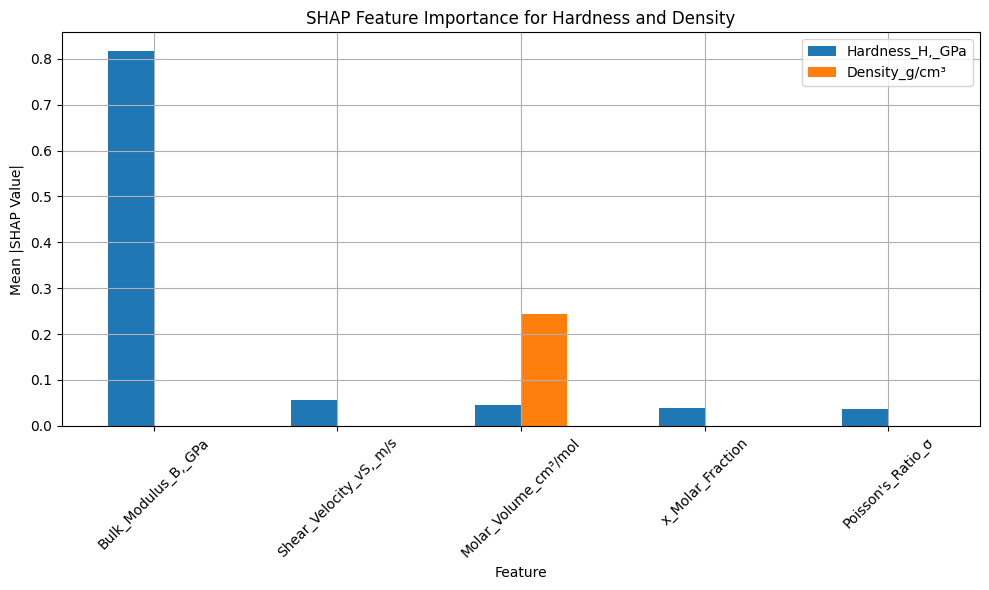

In [11]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# Define input and targets
features = ['Bulk_Modulus_B,_GPa', 'Shear_Velocity_vS,_m/s', 'Molar_Volume_cm³/mol',
            'x_Molar_Fraction', "Poisson's_Ratio_σ"]
targets = ['Hardness_H,_GPa', 'Density_g/cm³']

# Prepare the dataframe
X = data[features]
shap_summary = {}

# Loop through each target and collect SHAP values
for target in targets:
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train model
    model = XGBRegressor()
    model.fit(X_train, y_train)

    # SHAP values
    explainer = shap.Explainer(model, X_train)
    shap_values = explainer(X_test)

    # Calculate mean(|SHAP|) values
    mean_shap = pd.DataFrame({
        'Feature': features,
        f'{target}': np.abs(shap_values.values).mean(axis=0)
    })

    shap_summary[target] = mean_shap.set_index('Feature')

# Combine into one dataframe
combined = pd.concat(shap_summary.values(), axis=1)
combined = combined.reset_index().rename(columns={'index': 'Feature'})

# Plot grouped bar chart
combined.plot(x='Feature', kind='bar', figsize=(10, 6))
plt.title('SHAP Feature Importance for Hardness and Density')
plt.ylabel('Mean |SHAP Value|')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
import os
import shap
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# Make sure the folder exists
output_dir = "C:/Users/darsh/Desktop/darsh/image"
os.makedirs(output_dir, exist_ok=True)

features = ['Bulk_Modulus_B,_GPa', 'Shear_Velocity_vS,_m/s', 'Molar_Volume_cm³/mol',
            'x_Molar_Fraction', "Poisson's_Ratio_σ"]

X = data[features]

for target in ['Hardness_H,_GPa', 'Density_g/cm³']:
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = XGBRegressor()
    model.fit(X_train, y_train)

    explainer = shap.Explainer(model, X_test)
    shap_values = explainer(X_test)

    # Create individual bar plot
    plt.figure()
    shap.plots.bar(shap_values, max_display=5, show=False)
    plt.title(f"SHAP Bar Plot - {target}")
    plt.tight_layout()
    plt.savefig(f"{output_dir}/SHAP_Bar_{target.replace('/', '_')}.png", dpi=300)
    plt.close()

    # Create individual beeswarm plot
    plt.figure()
    shap.plots.beeswarm(shap_values, max_display=5, show=False)
    plt.title(f"SHAP Beeswarm Plot - {target}")
    plt.tight_layout()
    plt.savefig(f"{output_dir}/SHAP_Beeswarm_{target.replace('/', '_')}.png", dpi=300)
    plt.close()


In [13]:
!pip install seaborn


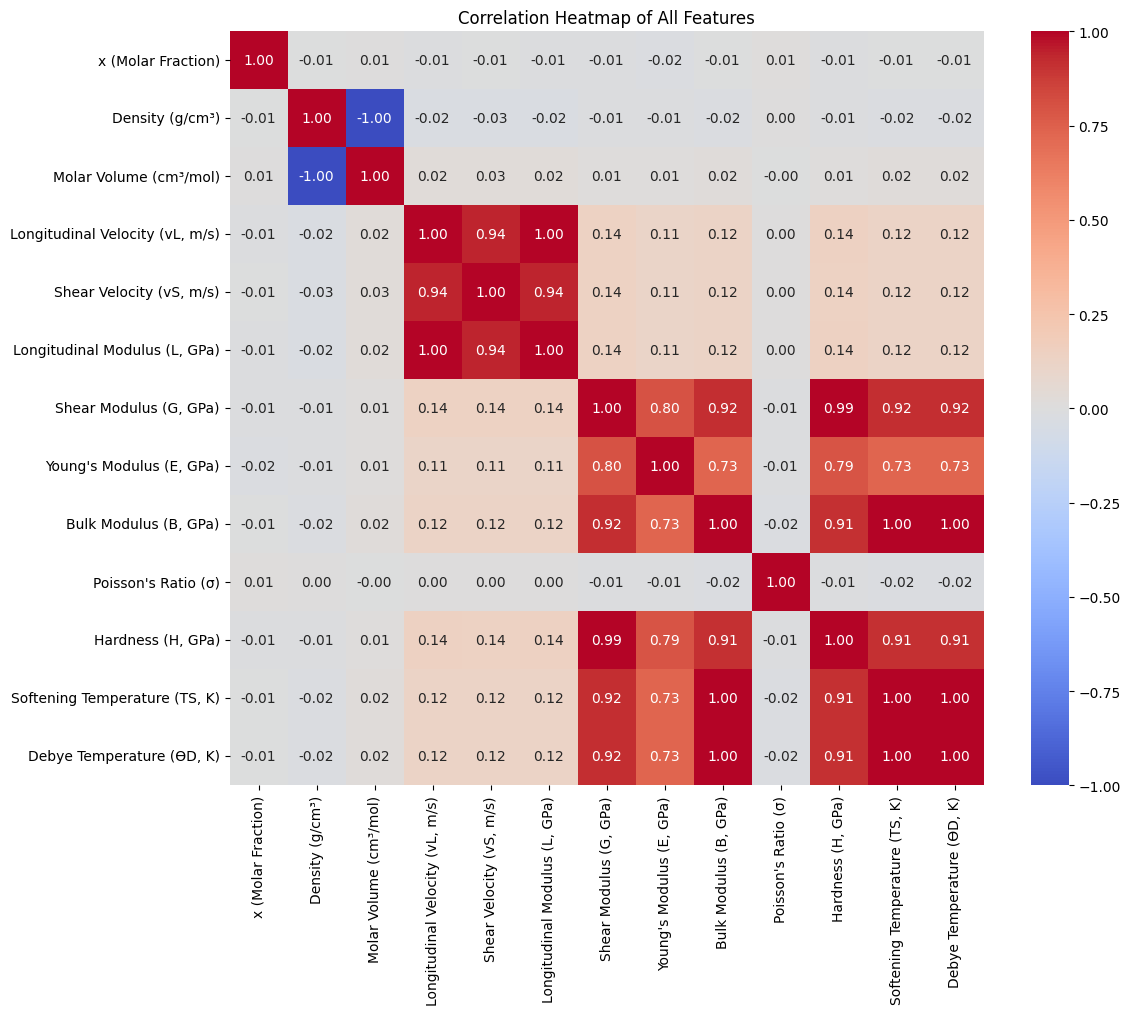

In [14]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("FYP (2).csv")

# Compute correlation matrix for numeric columns only
corr_matrix = df.corr(numeric_only=True)

# Plot and save heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, vmin=-1, vmax=1)
plt.title("Correlation Heatmap of All Features")
plt.tight_layout()
plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()


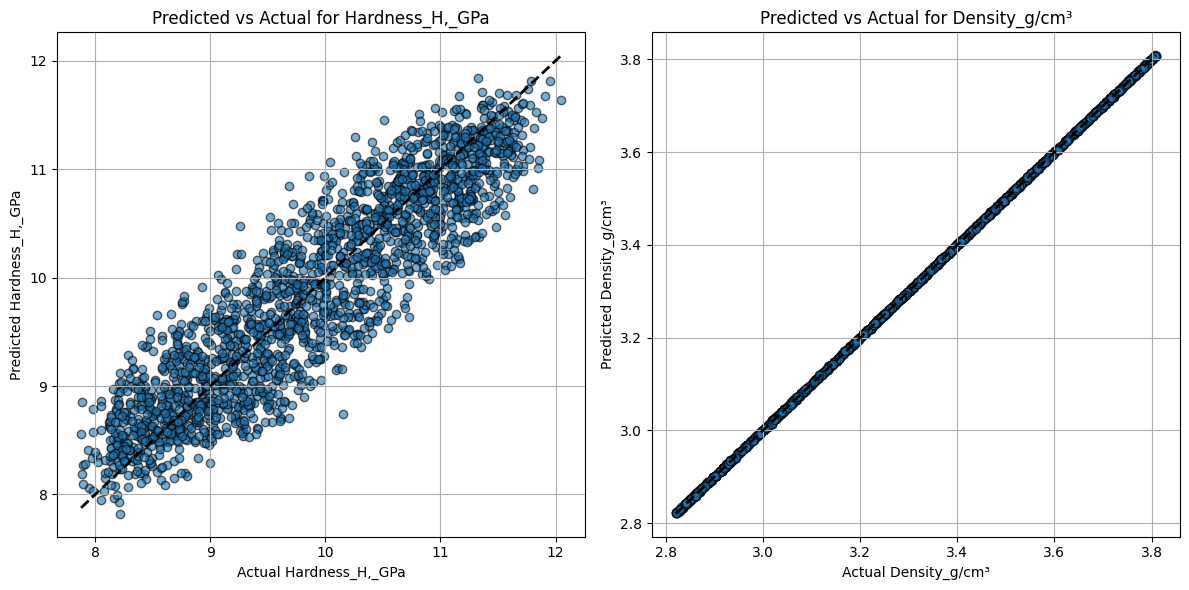

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# Load your dataset
data = pd.read_csv("FYP_cleaned.csv")

# Define features and targets
features = ['Bulk_Modulus_B,_GPa', 'Shear_Velocity_vS,_m/s', 'Molar_Volume_cm³/mol',
            'x_Molar_Fraction', "Poisson's_Ratio_σ"]
targets = ['Hardness_H,_GPa', 'Density_g/cm³']

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, target in enumerate(targets):
    # Split data
    X = data[features]
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train model
    model = XGBRegressor(random_state=42)
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Plot
    ax = axes[i]
    ax.scatter(y_test, y_pred, alpha=0.6, edgecolor='k')
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    ax.set_xlabel(f'Actual {target}')
    ax.set_ylabel(f'Predicted {target}')
    ax.set_title(f'Predicted vs Actual for {target}')
    ax.grid(True)

# Adjust layout and save
plt.tight_layout()
plt.savefig('predicted_vs_actual_Hardness_and_Density.png', dpi=300)
plt.show()


In [16]:
import time

training_times = {}

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    training_times[name] = end_time - start_time


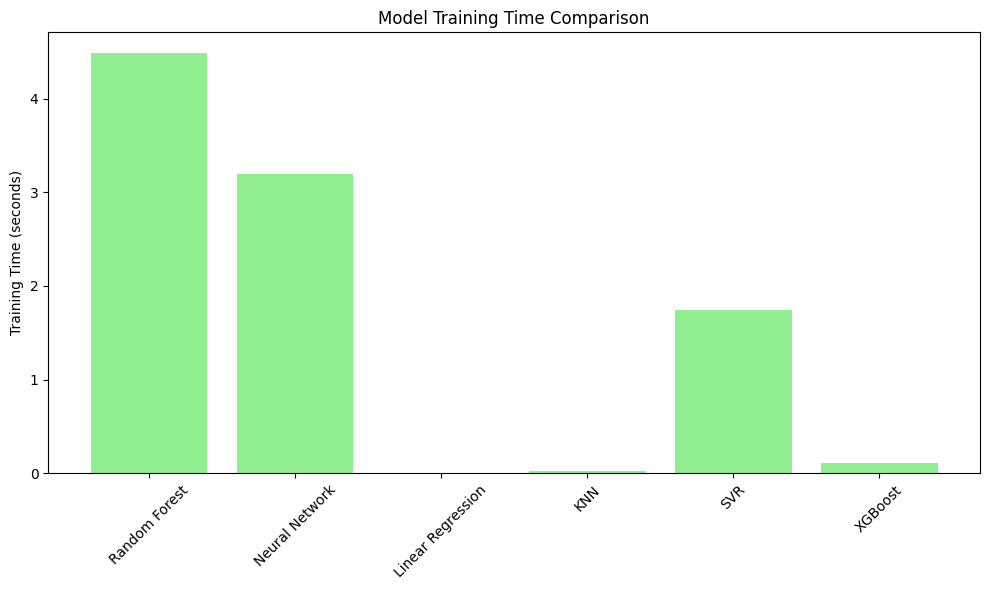

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(training_times.keys(), training_times.values(), color='lightgreen')
plt.ylabel("Training Time (seconds)")
plt.title("Model Training Time Comparison")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


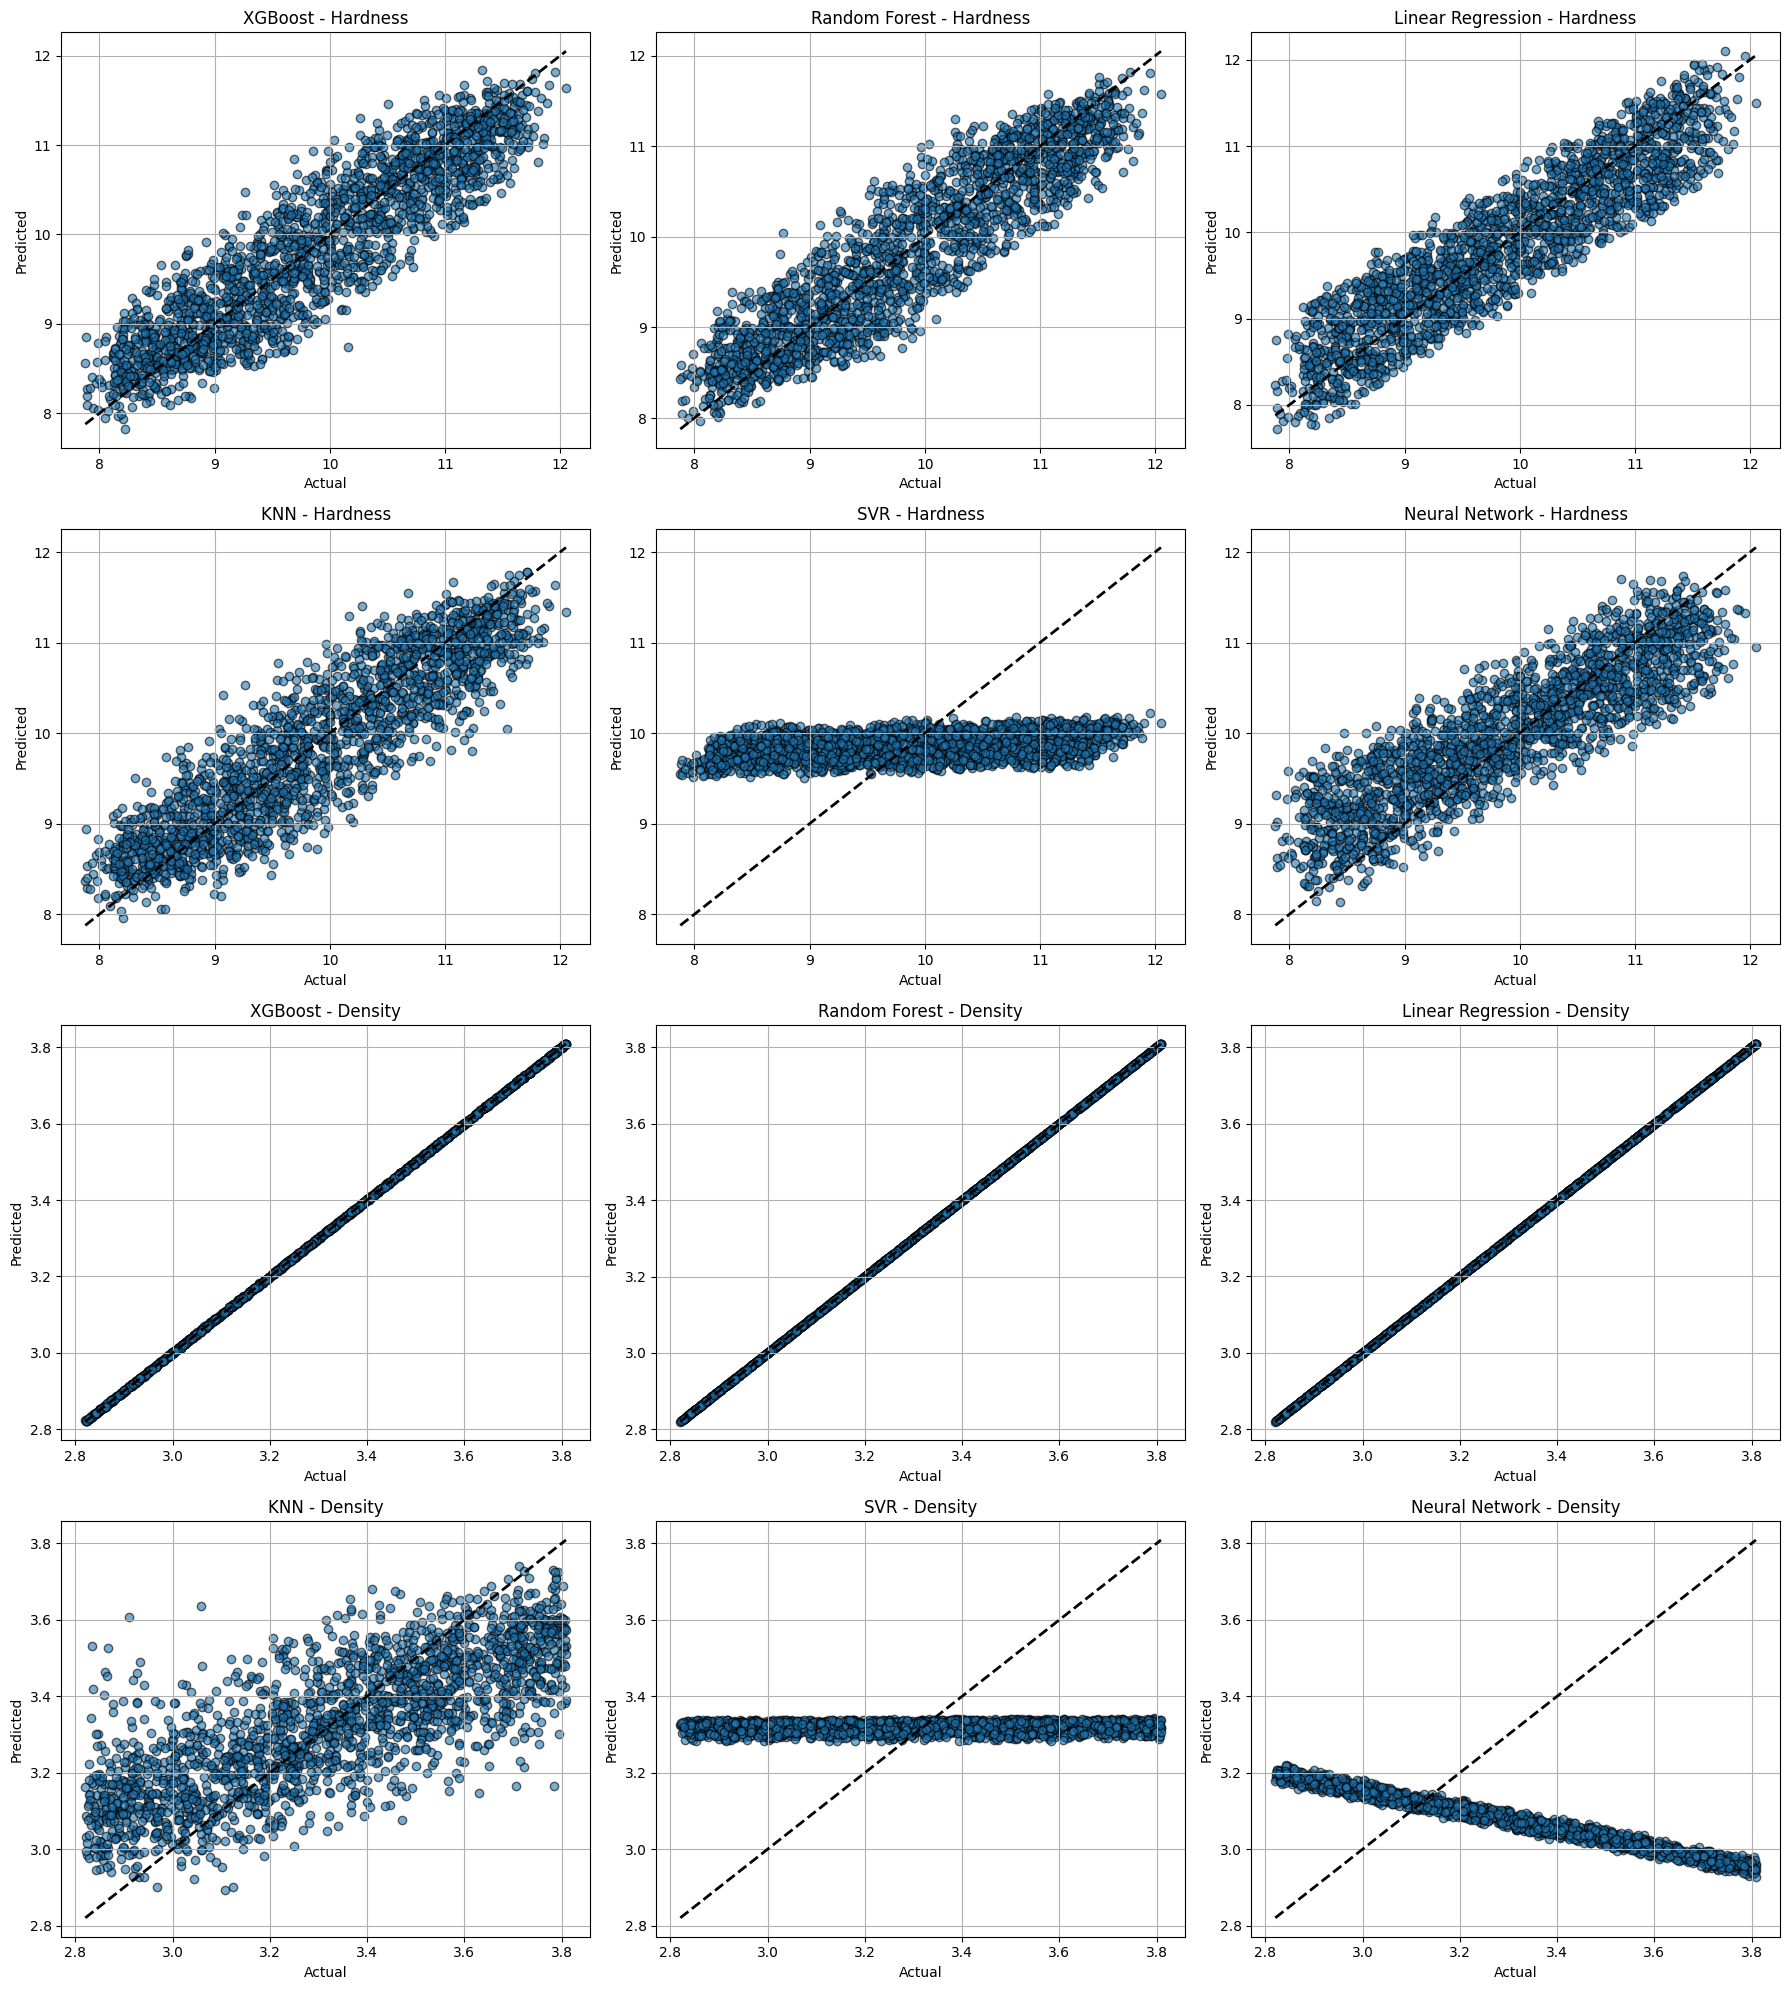

In [18]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

# Define models
models = {
    'XGBoost': XGBRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Linear Regression': LinearRegression(),
    'KNN': KNeighborsRegressor(),
    'SVR': SVR(),
    'Neural Network': MLPRegressor(random_state=42, max_iter=1000)
}

features = ['Bulk_Modulus_B,_GPa', 'Shear_Velocity_vS,_m/s', 'Molar_Volume_cm³/mol',
            'x_Molar_Fraction', "Poisson's_Ratio_σ"]
targets = ['Hardness_H,_GPa', 'Density_g/cm³']

# Prepare layout: 2 rows x 3 cols (1 row per target, 3 models per row)
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 20))
axes = axes.ravel()

axes = axes.ravel()

plot_idx = 0
for target in targets:
    for model_name, model in models.items():
        # Split data
        X = data[features]
        y = data[target]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Plot
        ax = axes[plot_idx]
        ax.scatter(y_test, y_pred, alpha=0.6, edgecolor='k')
        ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
        ax.set_title(f"{model_name} - {target.split('_')[0]}")
        ax.set_xlabel("Actual")
        ax.set_ylabel("Predicted")
        ax.grid(True)

        plot_idx += 1
        if plot_idx >= len(axes):  # In case you have more models
            break

plt.tight_layout()
plt.savefig("predicted_vs_actual_all_models.png", dpi=300)
plt.show()


In [21]:
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

# Define models
models = {
    'XGBoost': XGBRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Linear Regression': LinearRegression(),
    'KNN': KNeighborsRegressor(),
    'SVR': SVR(),
    'Neural Network': MLPRegressor(random_state=42, max_iter=1000)
}

# Features and targets
features = ['Bulk_Modulus_B,_GPa', 'Shear_Velocity_vS,_m/s', 'Molar_Volume_cm³/mol',
            'x_Molar_Fraction', "Poisson's_Ratio_σ"]
targets = ['Hardness_H,_GPa', 'Density_g/cm³']

# Create output folder if it doesn't exist
output_dir = "C:/Users/darsh/Desktop/darsh/image"
os.makedirs(output_dir, exist_ok=True)

# Loop for each target and model
for target in targets:
    for model_name, model in models.items():
        # Split and train
        X = data[features]
        y = data[target]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Plot
        plt.figure(figsize=(5, 5))
        plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k')
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
        plt.title(f"{model_name} - {target.split('_')[0]}")
        plt.grid(True)
        plt.tight_layout()

        # Clean filename
        clean_target = target.replace("/", "_").replace(",", "").replace("³", "3")
        filename = f"{model_name}_{clean_target}.png"

        # Save
        plt.savefig(os.path.join(output_dir, filename), dpi=300)
        plt.close()
